In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import * 
import sklearn.linear_model
import statsmodels.api as sm
import re
import os.path

%matplotlib inline

In [201]:
batch_name = "run_20210509_srf_magic_every=10000_exp=1"
output_path = os.path.join("/Users/regevschweiger/git/matrix_shuffle/datasets/ela_chr19/", batch_name)

target_hist = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/counts.txt", sep="\t")
dcounts = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/dcounts.txt", sep="\t")

thetas = pd.read_csv(os.path.join(output_path, "output.1000000000.thetas"), sep="\s+", header=None).values
hists = pd.read_csv(os.path.join(output_path, "output.1000000000.hists"), sep="\s+", header=None).values
thetas_ratio = np.maximum(np.log(target_hist.p[1:]/dcounts.p[1:]), -10000)

/Users/regevschweiger/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [218]:
pts = pd.read_csv(
    os.path.join(output_path, "output.1000000000"), 
    sep="\s+", header=None)

hp = np.histogram(np.diff(pts, axis=1), bins=target_hist.value)[0]


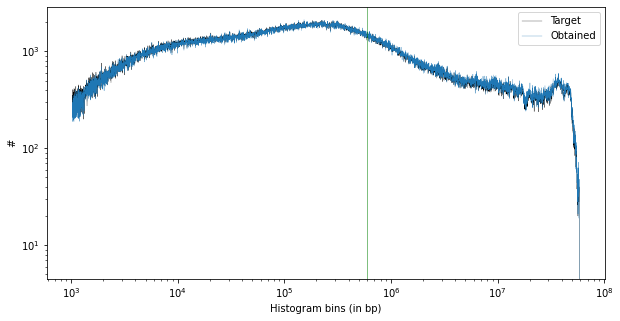

In [219]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], target_hist.p[1:-1], 'k', label="Target", lw=0.3)
plt.plot(target_hist.value[1:-1], hp[1:], label="Obtained", lw=0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")
plt.axvline((59109222/100), c='g', lw=0.5)

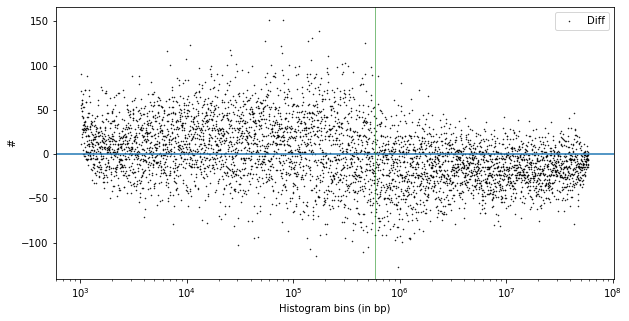

In [220]:
plt.figure(figsize=(10,5))
plt.plot(target_hist.value[1:-1], (target_hist.p[1:-1] - hp[1:]), 'k.', label="Diff", ms=1)
plt.axhline(0)
plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.xlabel("Histogram bins (in bp)")
plt.ylabel("#")
plt.axvline((59109222/100), c='g', lw=0.5)

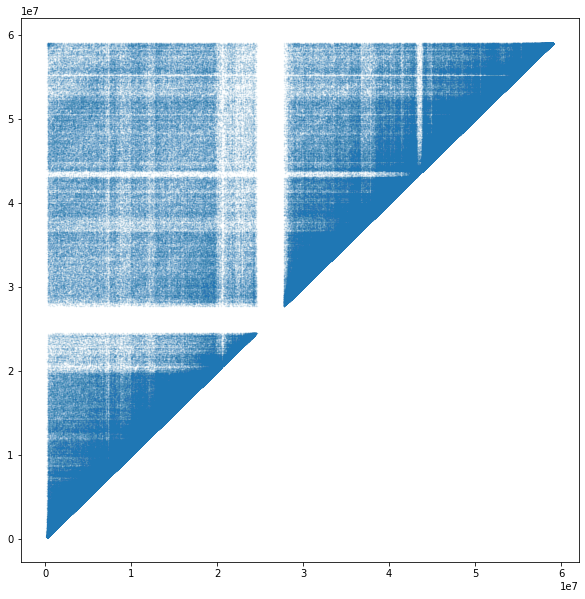

In [221]:
plt.figure(figsize=(10,10))
plt.plot(
    pts.values[:,0],
    pts.values[:,1],
    '.',
    ms=1,
    alpha=0.1
)

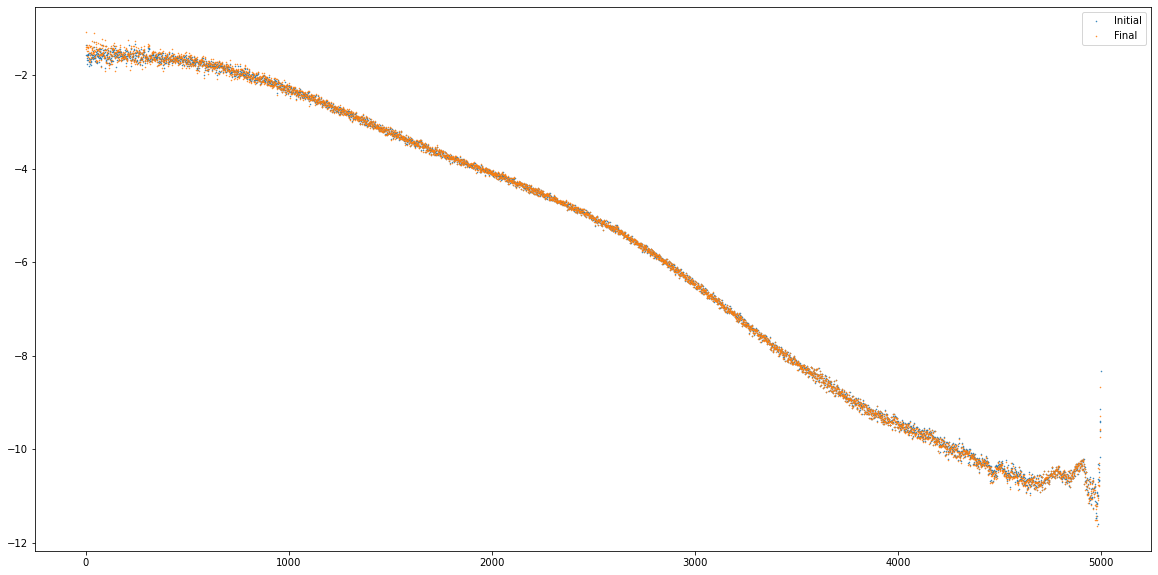

In [213]:
plt.figure(figsize=(20,10))
plt.plot(thetas_ratio[:-2], '.', ms=1, label="Initial")
plt.plot(thetas[-1][1:-1] , '.', ms=1, label="Final")
plt.legend()
#plt.ylim(-12,0)

(-1.0, 1.0)

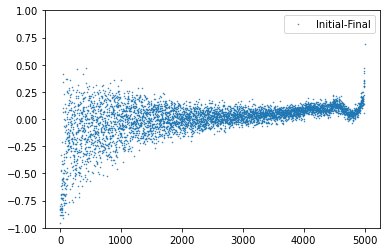

In [200]:
plt.figure()
plt.plot(thetas_ratio[:-2] - thetas[-1][1:-1], '.', ms=1, label="Initial-Final")

plt.legend()
plt.ylim(-1,1)